### Importing Required libraries

In [253]:
import numpy as np
from numpy.random import seed, randint,randn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings("ignore")

seed(42)  # Reproducible Results with numpy

### Sigmoid Neuron Class

In [252]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    
    def weighted_sum(self,x):
        return np.dot(x,self.w.T)+self.b
    
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    
    def grad_w(self,x,y):
        y_pred = self.sigmoid(self.weighted_sum(x))
        return (y_pred-y) * y_pred * (1-y_pred) * x
    
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.weighted_sum(x))
        return (y_pred-y) * y_pred * (1-y_pred)
    
    def train(self,X,Y,epochs=10,eta=0.01,weights_init=True,verbose=0):
        
        # dict to hold loss per iteration
        loss_dt = {}
        
        if weights_init:
            # initialize w and b
            self.w = np.random.randn(1,X.shape[1])
            self.b = 0
            
        for i in tqdm_notebook(range(epochs), total = epochs, unit='epoch'):
            dw = 0
            db = 0
            for x,y in zip(X,Y):
                dw = dw + self.grad_w(x,y)
                db = db = self.grad_b(x,y)
    
            self.w = self.w - eta * dw
            self.b = self.b - eta * db
            
            # compute the loss and put it in dict
            y_pred = self.sigmoid(self.weighted_sum(X))
            loss_dt[i] = mean_squared_error(y_pred,Y)
        
        if verbose:
            plt.plot(loss_dt.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
                   
    def predict(self,X,threshold=0.5):
        y_pred = []
        for x in X:
            pred = self.sigmoid(self.weighted_sum(x))
            if float(pred) >= threshold:
                y_pred.append(1)
            else:
                y_pred.append(0)
        return np.array(y_pred)
    
    def predict_proba(self,X):
        y_pred = []
        for x in X:
            pred = self.sigmoid(self.weighted_sum(x))
            y_pred.append(pred)
        return np.array(y_pred)
            
        

### Train using Toy Data

In [131]:
X = np.array([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]
model1 = SigmoidNeuron()
model1.train(X,Y)
model1.w, model1.b

(array([[-0.94710476,  0.28989485]]), array([-0.01467494]))

### Train using iris data

In [231]:
raw = load_iris()
data_x = raw['data']
data_y = raw['target']

# create the pandas dataframe
df = pd.DataFrame(data=data_x,columns=raw['feature_names'])

# concat the target to above dataframe
df['target'] = data_y

# It is multiclass problem , will convert it into binary
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# separate features and target
X = df[['sepal length (cm)',  'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y = df['target']

# split into train test split
X_train_df,X_test_df,y_train_df,y_test_df = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print('Shape of X_train_df:{} and y_train_df:{}'.format(X_train_df.shape,y_train_df.shape))
print('Shape of X_test_df:{} and y_test_df:{}'.format(X_test_df.shape,y_test_df.shape))

Shape of X_train_df:(120, 4) and y_train_df:(120,)
Shape of X_test_df:(30, 4) and y_test_df:(30,)


#### Check Distribution of target in train and test

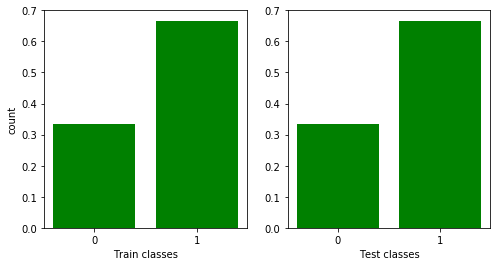

In [149]:
# check the distribution of target in train and test split
# fig, ax = plt.subplots(1,2)
fig, ax = plt.subplots(1,2,figsize=(8,4))

y1 = y_train.value_counts(normalize=True)
x1 = list(y_train.value_counts().index)
ax[0].bar(x1,y1,color='green')
ax[0].set_ylabel('count')
ax[0].set_xlabel('Train classes')
ax[0].set_xticks([0,1])

y2 = y_test.value_counts(normalize=True)
x2 = y_test.value_counts().index
ax[1].bar(x2,y2,color='green')
ax[1].set_xlabel('Test classes')
ax[1].set_xticks([0,1])

plt.show()

#### Train the model

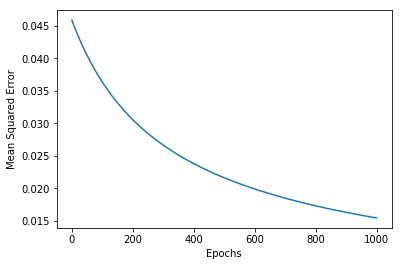

(array([[ 0.06058062, -1.27351185,  2.09462116,  1.12948108]]),
 array([-0.0007236]))

In [255]:
# Standadize the data
std = StandardScaler()
X_train = std.fit_transform(X_train_df)
X_test = std.transform(X_test_df)

# convert pandas dataframe to numpy array
y_train = y_train_df.values
y_test = y_test_df.values

# create an object of SigmoidNeuron
model2 = SigmoidNeuron()

# Train the model
model2.train(X_train,y_train,epochs = 1000,eta=0.001, verbose=1)

# Print the weights and intercept
model2.w, model2.b

#### Get the predictions for train and test

In [256]:
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

In [257]:
print('Train Accuracy:{} and F1_Score:{}'.format(accuracy_score(y_train,y_pred_train)*100, f1_score(y_train,y_pred_train)))
print('Test Accuracy:{} and F1_Score:{}'.format(accuracy_score(y_test,y_pred_test)*100, f1_score(y_test,y_pred_test)))

Train Accuracy:100.0 and F1_Score:1.0
Test Accuracy:100.0 and F1_Score:1.0
